In [189]:
%pip install numpy keras matplotlib tqdm

Note: you may need to restart the kernel to use updated packages.


In [190]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from tqdm import tqdm

**Data Manipulation:**

In [191]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

x_train = np.reshape(x_train, (x_train.shape[0], -1)) / 255
x_test = np.reshape(x_test, (x_test.shape[0], -1)) / 255

# m: Number of train images
# n: Number of pixels
# m_t: Number of test images
m,n = x_train.shape
m_t = x_test.shape[0]

def one_hot_encoding(size, Y):
    ny = np.zeros(size)
    for i in range(size[0]):
        ny[i,Y[i]] = 1
    return ny

y_train = one_hot_encoding((m,10), y_train)
y_test = one_hot_encoding((m_t,10), y_test)

W = np.random.normal(0, 0.01, (n, 10))
B = np.random.normal(0, 0.01, (1, 10))

**Model Functions:**

In [192]:
def softmax_predictions(X, W, B):
    Z = np.matmul(X,W) + B
    Z = np.clip(Z, -700, 700)
    EXP = np.exp(Z)
    CD = np.reshape(np.sum(EXP, axis=1),(Z.shape[0],1))
    H = EXP / CD
    return H

def gradients(X, Y, H, lambda_):
    common_factor = H - Y
    GB = np.matmul(np.ones((1,m)),common_factor)
    GW = np.matmul(X.T,common_factor) + lambda_
    return GW,GB

def comp_loss(Y, H, lambda_):
    epsilon = 1e-15
    H = np.clip(H, epsilon, 1 - epsilon)
    cross_entropy_loss = -1 * np.sum(Y * np.log(H)) / 2
    l2_loss = lambda_ * np.sum(W ** 2) / 2
    return cross_entropy_loss + l2_loss

def train_model(X, Y, W, B, alpha=0.05, epochs=100, lambda_=0.1):
    loss_hist = []
    for _ in tqdm(range(epochs)):
        H = softmax_predictions(X,W,B)
        GW,GB = gradients(X,Y,H,lambda_)
        W -= alpha*GW
        B -= alpha*GB
        loss_hist.append(comp_loss(Y,H,lambda_))
        alpha *= 0.9999
    loss_hist = np.array(loss_hist)
    return B,W,loss_hist

def test_model(X, Y, W, B):
    H = softmax_predictions(X,W,B)
    H = np.argmax(H, axis=1)
    Y = np.argmax(Y, axis=1)
    num_corr = np.sum(H == Y)
    acc = num_corr/len(H)
    return acc

**Model Training:**

In [193]:
epochs = 5000
lambda_ = 0.1
alpha = 3e-5
B,W,loss_hist = train_model(x_train, y_train, W, B, epochs=epochs, lambda_=lambda_, alpha=alpha)

100%|██████████| 5000/5000 [09:44<00:00,  8.55it/s]


**Training Statistics:**

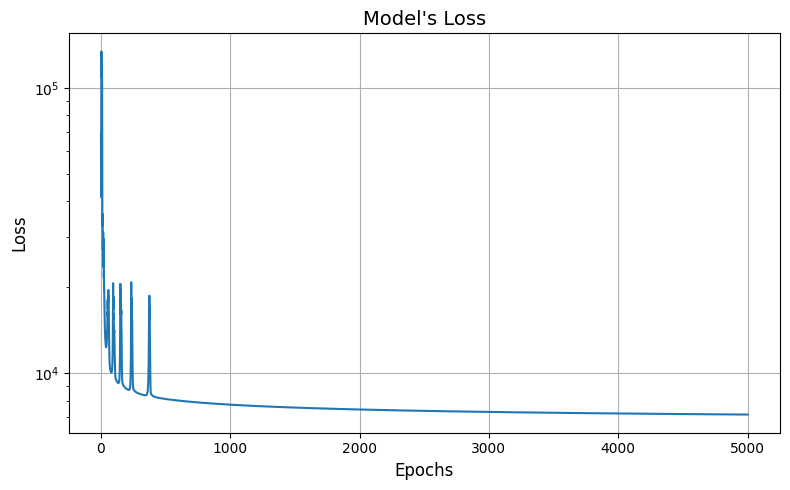

Accuracy: 0.9349


In [194]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), loss_hist)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Model's Loss", fontsize=14)
plt.yscale("log")
plt.grid()
plt.tight_layout()
plt.show()

accuracy = test_model(x_train, y_train, W, B)
print(f"Accuracy: {accuracy:.4f}")


**Testing Statistics:**

In [195]:
accuracy_test = test_model(x_test, y_test, W, B)
print(f"Accuracy: {accuracy_test:.4f}")

Accuracy: 0.9262


**Saving Parameters:**

In [196]:
np.savez("parameters_softmax_WB.npz", array1=W, array2=B)